In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# separating the dataset

In [2]:
dataset = pd.read_csv('./data/matches_bets.csv')
dataset['winner'] = dataset.apply(lambda row: 0 if row['home_team_goal'] > row['away_team_goal'] else (1 if row['home_team_goal'] == row['away_team_goal'] else 2), axis=1)
dataset.head()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,winner
0,9987,9993,1,1,1.73,3.40,5.00,1.75,3.35,4.20,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1
1,10000,9994,0,0,1.95,3.20,3.60,1.80,3.30,3.95,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1
2,9984,8635,0,3,2.38,3.30,2.75,2.40,3.30,2.55,...,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2
3,9991,9998,5,0,1.44,3.75,7.50,1.40,4.00,6.80,...,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,0
4,7947,9985,1,3,5.00,3.50,1.65,5.00,3.50,1.60,...,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,2


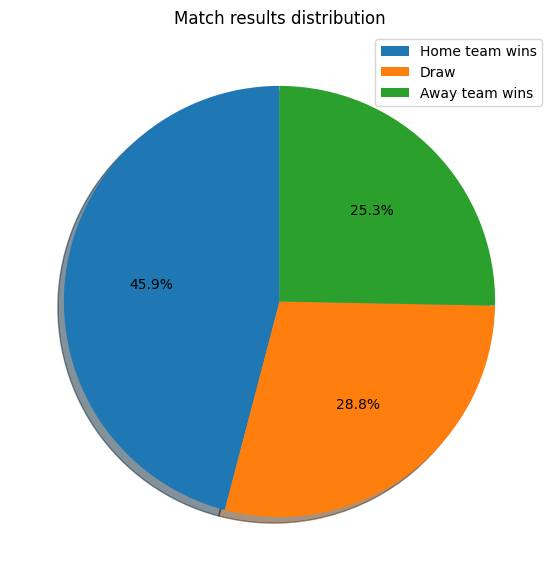

In [102]:
#plot a pie chart of the 'winner' feature of the dataset
plt.figure(figsize=(7,7))
plt.title('Match results distribution')
plt.pie(dataset['winner'].value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels=['Home team wins', 'Draw', 'Away team wins'], loc="best")

In [5]:
#remove the column id, home_team_goal and away_team_goal from the dataframe
dataset = dataset.drop(['home_team_goal', 'away_team_goal'], axis=1)

In [8]:
y = dataset['winner']
X = dataset.drop('winner', axis=1)

In [9]:
X.dtypes

home_team_api_id      int64
away_team_api_id      int64
B365H               float64
B365D               float64
B365A               float64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1)

# Random Forest

In [12]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=1)

In [13]:
Y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x200a76f09d0>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

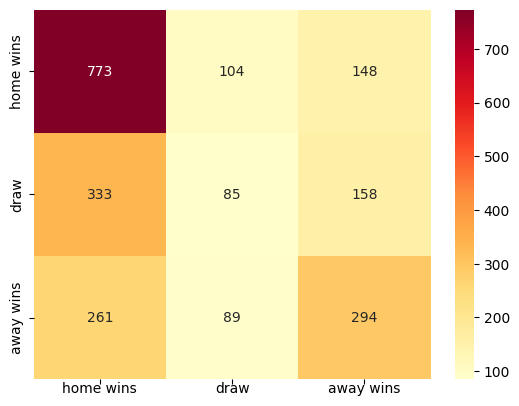

In [15]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [16]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65      1025
           1       0.31      0.15      0.20       576
           2       0.49      0.46      0.47       644

    accuracy                           0.51      2245
   macro avg       0.45      0.45      0.44      2245
weighted avg       0.48      0.51      0.48      2245



# XGBoost

In [18]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=-1)
classifier.fit(X_train, y_train, )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [19]:
Y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x200fa50b160>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

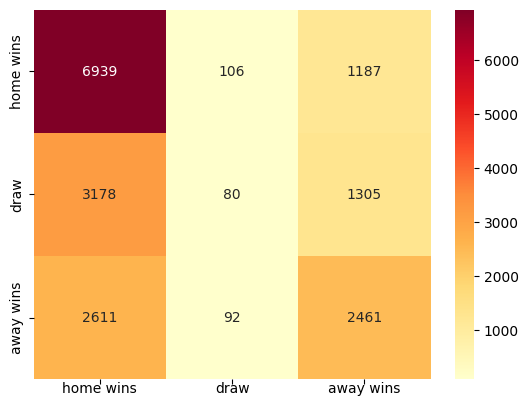

In [21]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [22]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.84      0.66      8232
           1       0.29      0.02      0.03      4563
           2       0.50      0.48      0.49      5164

    accuracy                           0.53     17959
   macro avg       0.44      0.45      0.39     17959
weighted avg       0.47      0.53      0.45     17959



# Multiple runs for both algorithms of a dataset

In [29]:
#get mean accuracy of 5 runs of random forest classifier for different percentages of split train/test
# plot mean accuracy over test percentage with standard deviation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# fit the model
mean_results_random_forest = []
std_random_forest = []
for test_percentage in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_percentage)
    results = []
    for _ in range(5):
        classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             n_jobs=-1)
        #fit model
        classifier.fit(X_train, y_train)
        #calculate accuracy
        results.append(classifier.score(X_test, y_test))
    
    results = np.array(results)
    mean_results_random_forest.append(results.mean())
    std_random_forest.append(results.std())

In [44]:

from xgboost import XGBClassifier

# fit the model
mean_results_xgboost = []
std_xgboost = []
for test_percentage in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_percentage)
    results = []
    for _ in range(5):
        classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=1)
        #fit model
        classifier.fit(X_train, y_train)
        #calculate accuracy
        results.append(classifier.score(X_test, y_test))
        
    results = np.array(results)
    mean_results_xgboost.append(results.mean())
    std_xgboost.append(results.std())

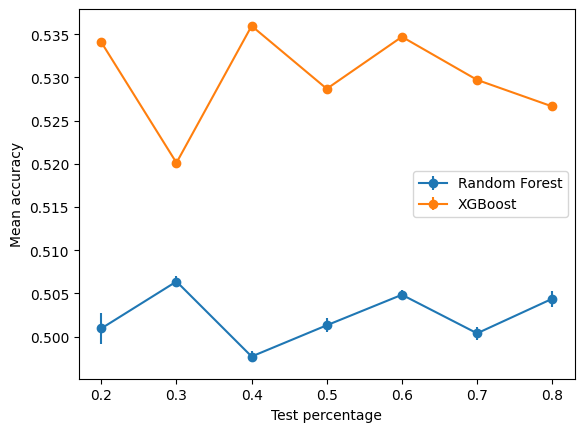

In [43]:
# plot mean_results_xgboost and mean_results_random_forest with their respective standard deviation
plt.errorbar([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], mean_results_random_forest, yerr=std_random_forest, fmt='-o')
plt.errorbar([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], mean_results_xgboost, yerr=std_xgboost, fmt='-o')
plt.xlabel('Test percentage')
plt.ylabel('Mean accuracy')
#add legend
plt.legend(['Random Forest', 'XGBoost'])

# Using more bet houses

## 3 bet houses

In [5]:
dataset = pd.read_csv('./data/matches_bets.csv')
dataset = dataset.drop(['GBH','GBD','GBA','BSH','BSD','BSA'], axis=1)
dataset.head()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,...,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA
0,9987,9993,1,1,1.73,3.40,5.00,1.75,3.35,4.20,...,3.75,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50
1,10000,9994,0,0,1.95,3.20,3.60,1.80,3.30,3.95,...,3.50,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25
2,9984,8635,0,3,2.38,3.30,2.75,2.40,3.30,2.55,...,2.50,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65
3,9991,9998,5,0,1.44,3.75,7.50,1.40,4.00,6.80,...,6.50,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50
4,7947,9985,1,3,5.00,3.50,1.65,5.00,3.50,1.60,...,1.72,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65


In [7]:
dataset['winner'] = dataset.apply(lambda row: 0 if row['home_team_goal'] > row['away_team_goal'] else (1 if row['home_team_goal'] == row['away_team_goal'] else 2), axis=1)
dataset7 = dataset
dataset6 = dataset.copy().drop(['VCH','VCD','VCA'], axis=1)
dataset5 = dataset.copy().drop(['VCH','VCD','VCA', 'SJH','SJD','SJA'], axis=1)
dataset4 = dataset.copy().drop(['VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA'], axis=1)
dataset3 = dataset.copy().drop(['VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA','LBH','LBD','LBA'], axis=1)
dataset2 = dataset.copy().drop(['VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA','LBH','LBD','LBA', 'IWH','IWD','IWA'], axis=1)
dataset1 = dataset.copy().drop(['VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA','LBH','LBD','LBA', 'IWH','IWD','IWA', 'BWH','BWD','BWA'], axis=1)

In [68]:
y = dataset3['winner']
X = dataset3.drop('winner', axis=1)
#remove the column id, home_team_goal and away_team_goal from the dataframe
X = X.drop(['home_team_goal', 'away_team_goal'], axis=1)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [70]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=1)

In [71]:
Y_pred = classifier.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x20103487010>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

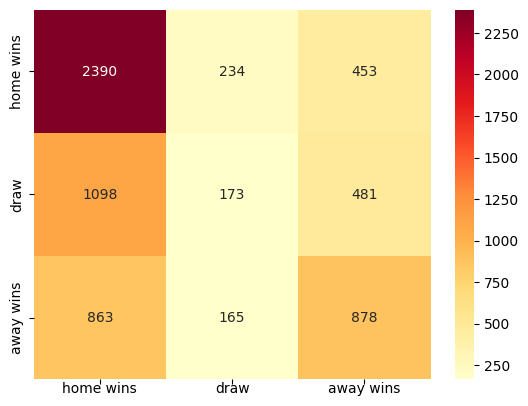

In [73]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [74]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.78      0.64      3077
           1       0.30      0.10      0.15      1752
           2       0.48      0.46      0.47      1906

    accuracy                           0.51      6735
   macro avg       0.45      0.45      0.42      6735
weighted avg       0.47      0.51      0.47      6735



In [75]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=-1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [76]:
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x2010357c340>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

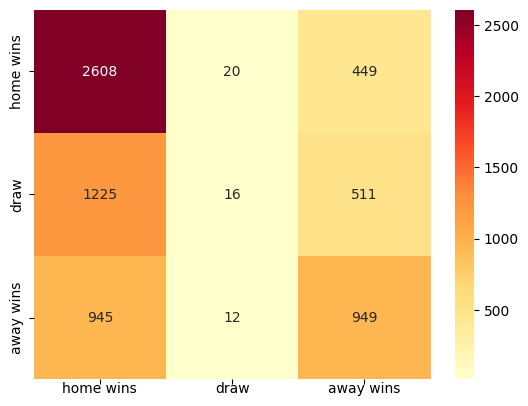

In [77]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [78]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.66      3077
           1       0.33      0.01      0.02      1752
           2       0.50      0.50      0.50      1906

    accuracy                           0.53      6735
   macro avg       0.46      0.45      0.39      6735
weighted avg       0.48      0.53      0.45      6735



## 5 bet houses

In [79]:
dataset = pd.read_csv('./data/matches_bets.csv')
dataset['winner'] = dataset.apply(lambda row: 0 if row['home_team_goal'] > row['away_team_goal'] else (1 if row['home_team_goal'] == row['away_team_goal'] else 2), axis=1)
dataset1 = dataset.copy().drop(['BWH', 'BWA', 'BWD', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA'], axis=1)
dataset2 = dataset.copy().drop(['IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA'], axis=1)
dataset3 = dataset.copy().drop(['LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA'], axis=1)
dataset4 = dataset.copy().drop(['WHH', 'WHD', 'WHA'], axis=1)
dataset5 = dataset

In [80]:
y = dataset5['winner']
X = dataset5.drop('winner', axis=1)
#remove the column id, home_team_goal and away_team_goal from the dataframe
X = X.drop(['home_team_goal', 'away_team_goal'], axis=1)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [82]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=1)

In [83]:
Y_pred = classifier.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x2010e29a0e0>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

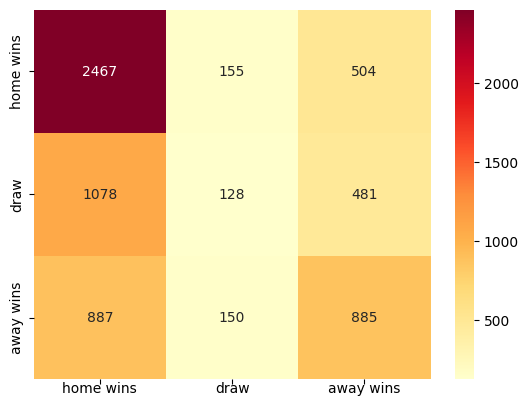

In [85]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [86]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.79      0.65      3126
           1       0.30      0.08      0.12      1687
           2       0.47      0.46      0.47      1922

    accuracy                           0.52      6735
   macro avg       0.44      0.44      0.41      6735
weighted avg       0.47      0.52      0.47      6735



In [87]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=-1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [88]:
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x2010e35e830>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

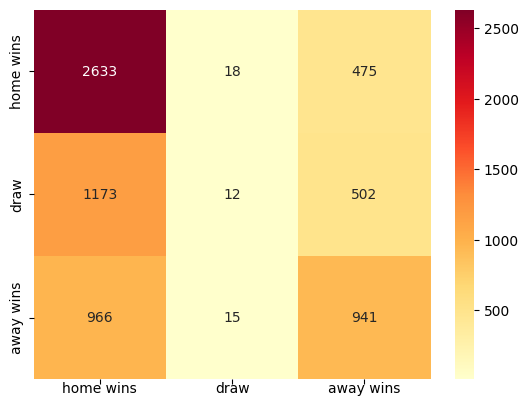

In [89]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [90]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.84      0.67      3126
           1       0.27      0.01      0.01      1687
           2       0.49      0.49      0.49      1922

    accuracy                           0.53      6735
   macro avg       0.44      0.45      0.39      6735
weighted avg       0.46      0.53      0.45      6735



## Accuracy over bet house amount

In [22]:
import pandas as pd

dataset = pd.read_csv('./data/matches_bets.csv')
dataset['winner'] = dataset.apply(lambda row: 0 if row['home_team_goal'] > row['away_team_goal'] else (1 if row['home_team_goal'] == row['away_team_goal'] else 2), axis=1)
dataset = dataset.drop(['home_team_goal', 'away_team_goal'], axis=1)
dataset9 = dataset
dataset8 = dataset.copy().drop(['BSH','BSD','BSA'], axis=1)
dataset7 = dataset.copy().drop(['BSH','BSD','BSA','GBH','GBD','GBA'], axis=1)
dataset6 = dataset.copy().drop(['BSH','BSD','BSA','GBH','GBD','GBA','VCH','VCD','VCA'], axis=1)
dataset5 = dataset.copy().drop(['BSH','BSD','BSA','GBH','GBD','GBA','VCH','VCD','VCA', 'SJH','SJD','SJA'], axis=1)
dataset4 = dataset.copy().drop(['BSH','BSD','BSA','GBH','GBD','GBA','VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA'], axis=1)
dataset3 = dataset.copy().drop(['BSH','BSD','BSA','GBH','GBD','GBA','VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA','LBH','LBD','LBA'], axis=1)
dataset2 = dataset.copy().drop(['BSH','BSD','BSA','GBH','GBD','GBA','VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA','LBH','LBD','LBA', 'IWH','IWD','IWA'], axis=1)
dataset1 = dataset.copy().drop(['BSH','BSD','BSA','GBH','GBD','GBA','VCH','VCD','VCA', 'SJH','SJD','SJA', 'WHH','WHD','WHA','LBH','LBD','LBA', 'IWH','IWD','IWA', 'BWH','BWD','BWA'], axis=1)

In [23]:
dataset_list = [ dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7, dataset8, dataset9]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

In [25]:
mean_accuracy_xgboost = []
mean_accuracy_random_forest = []
std_dev_accuracy_xgboost = []
std_dev_accuracy_random_forest = []

for dataset in dataset_list:
    y = dataset['winner']
    X = dataset.drop('winner', axis=1)
    accuracy_xgboost = []
    accuracy_random_forest = []
    for _ in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        classifier = RandomForestClassifier(criterion='gini', 
                                 n_estimators=1000,
                                 min_samples_split=10,
                                 min_samples_leaf=1,
                                 oob_score=True,
                                 random_state=1,
                                 n_jobs=-1)
        classifier.fit(X_train, y_train)

        #calculate accuracy
        accuracy_random_forest.append(classifier.score(X_test, y_test))

        classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=-1)
        classifier.fit(X_train, y_train)

        accuracy_xgboost.append(classifier.score(X_test, y_test))

    accuracy_random_forest = np.array(accuracy_random_forest)
    accuracy_xgboost = np.array(accuracy_xgboost)
    mean_accuracy_xgboost.append(accuracy_xgboost.mean())
    mean_accuracy_random_forest.append(accuracy_random_forest.mean())
    std_dev_accuracy_xgboost.append(accuracy_xgboost.std())
    std_dev_accuracy_random_forest.append(accuracy_random_forest.std())

Text(0.5, 1.0, 'Accuracy over Bet houses')

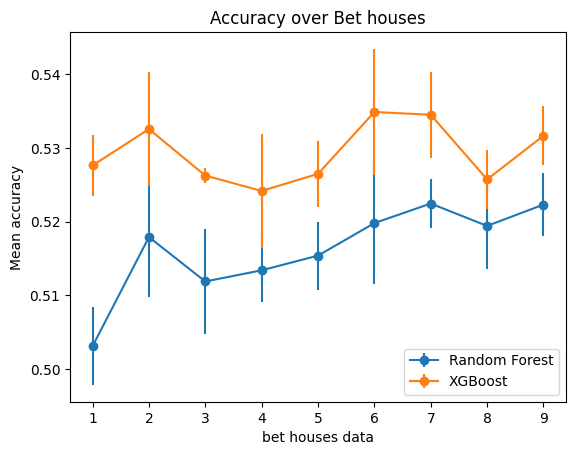

In [27]:
#plot mean accuracy with standard deviation for both algorithms
plt.errorbar([1,2,3,4,5,6,7,8,9], mean_accuracy_random_forest, yerr=std_dev_accuracy_random_forest, fmt='-o')
plt.errorbar([1,2,3,4,5,6,7,8,9], mean_accuracy_xgboost, yerr=std_dev_accuracy_xgboost, fmt='-o')
plt.xlabel('bet houses data')
plt.ylabel('Mean accuracy')
#add legend to the bottom right
plt.legend(['Random Forest', 'XGBoost'], loc='lower right')
plt.title("Accuracy over Bet houses")